# Introduction to Machine Learning, UZH 2018, Group Project
### Group 2: Barbara Capl, Mathias Lüthi, Pamela Matias, Stefanie Rentsch
###      
# 3. Prediction: MAIN FILE, best results / combinations

###   
In this section we use the feature matrices and response vectors with features selected in chapter 2. 


In [1]:
# hide unnecessary warnings ("depreciation" of packages etc.)
import warnings
warnings.filterwarnings('ignore')

# Load packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.formula.api as smf

from sklearn import metrics
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
plt.style.use('seaborn-whitegrid')

###    
###   
## 3.0. SETTINGS

### (1) Choose the Dataset Version you want

##### Whole Feature Matrix (Features not pre-selected)
VERSION = 1; Feature Matrix with only ratios                                  
VERSION = 2;  Feature Matrix with ratios + saisonality + other market data

##### Reduced Feature Matrix (Features pre-selected)
VERSION = 1.1; Reduced Feature Matrix with only ratios-> best dataset for section 3.3                                  
VERSION = 2.1;  Reduced Feature Matrix with ratios + saisonality + other market data-> best dataset for section 3.2



In [2]:
### Chose which dataset version you want the selection of features and the prediction to be based on 
VERSION = 2
"""
INSERT NUMBER 1, 2, 1.1 or 2.1
"""



# Defining sel_state variable for easier printing out    
if VERSION == 1:
    sel_version = 'Based on whole original Dataset with only the Ratios Dataset as predicive Features.'
elif VERSION == 2:
    sel_version = 'Based on whole original Dataset with Ratios + Seasonality + other Market Data as predictive Features.'
elif VERSION == 1.1:
    sel_version = 'Based on reduced Dataset with only the Ratios Dataset as predicive Features.'
elif VERSION == 2.1:
    sel_version = 'Based on reduced Dataset with Ratios + Seasonality + other Market Data as predictive Features.'
else: raise ValueError('VERSION must be either 1, 2, 1.1 or 2.1')

### (2) If you chose VERSION 1.1. or VERSION 2.1:  (Reduced Feature Matrix)                                                                  
### => Choose with which method you want to have the features been pre-selected /reduced

##### You have the choice between:
mySELECTION  = RF ; Features pre-selected with Random Forest Classifier-> best selection for predictions                                                           
mySELECTION = PCA; Features pre-selected with Principal Component Analysis (PCA)                                         

##### By Default;
If VERSION 1 or VERSION 2 was chosen above: SELECTION = none by Default; no features pre-selected. You don't need to define variable mySELECTION.

In [3]:
### Choose whether you want the datasets with features selected with RF or PCA or the original file
mySELECTION = 'RF'
"""
INSERT WISHED METHOD 'RF', 'PCA'
"""



# This is the control loop. If something has been chosen wrong, it returns an error with explanation.
if VERSION == 1 or VERSION == 2:
    SELECTION = 'none'
elif VERSION == 1.1 or VERSION == 2.1:
    SELECTION = mySELECTION
    if mySELECTION is not 'RF' and mySELECTION is not 'PCA':
        raise ValueError('Because VERSION '+str(VERSION)+' is chosen, mySELECTION must be set as either RF or PCA.')
else: raise ValueError('VERSION must be either 1, 2, 1.1 or 2.1. mySELECTION must be chosen as either RF or PCA.')

# Defining of sel_feat (Selected Feature Selection Method) variable and briefing for later.   
if SELECTION == 'RF':
    sel_feat = 'Random Forest (RF)'
    briefing = ('You chose dataset VERSION '+str(VERSION)+' and SELECTION method '+str(SELECTION)+'.'+'\n'+'Features therefore pre-selected with '+str(sel_feat)+'.')
elif SELECTION == 'PCA':
    sel_feat = 'Principal Component Analysis (PCA)'
    briefing = ('You chose dataset VERSION '+str(VERSION)+' and SELECTION method '+str(SELECTION)+'.'+'\n'+'Features therefore pre-selected with '+str(sel_feat)+'.')
elif SELECTION == 'none':
    sel_feat = 'No Feature Selection Method available.'
    briefing = ('You chose VERSION '+str(VERSION)+'. This Version has no Feature Selection Method because Feature Matrix is whole, not reduced.'+'\n'+'SELECTION is therefore "none" by Default.')
else: raise ValueError('mySELECTION must be chosen as either RF or PCA')
print('You chose SELECTION method '+str(sel_feat)+'.')
#print(sel_feat)

You chose SELECTION method No Feature Selection Method available..


### (3) SUMMARY OF SETTINGS

In [4]:
print(briefing, '\n')
print('VERSION '+str(VERSION)+' is '+str(sel_version),'\n')
print('You are now done with the Settings. You can run the whole Code now by Default.')

You chose VERSION 2. This Version has no Feature Selection Method because Feature Matrix is whole, not reduced.
SELECTION is therefore "none" by Default. 

VERSION 2 is Based on whole original Dataset with Ratios + Seasonality + other Market Data as predictive Features. 

You are now done with the Settings. You can run the whole Code now by Default.


###    
###   
###      
## 3.1. Preparation

### 3.1.1. Import the Response Vector and the Feature Matrix

In [5]:
### import Data (already splitted to train/test-data and selected features-> bc_randomforest_feature_selection)
if VERSION == 1: 
# features not pre-selected, only ratios
    X = pd.read_csv('Data/generated_datasets/features_ratios_1.csv', sep=',', header=0)
    y = pd.read_csv('Data/generated_datasets/response_1.csv', sep=',', header=0)
elif VERSION == 2: 
# features not pre-selected, ratios + seasonality + market data
    X = pd.read_csv('Data/generated_datasets/features_additional_1.csv', sep=',', header=0)
    y = pd.read_csv('Data/generated_datasets/response_1.csv', sep=',', header=0)
elif VERSION == 1.1: 
# features pre-selected, only ratios
    if SELECTION == 'RF':
        X_train_s = pd.read_csv('Data/generated_splits/features_selected_randomforest/X1_train_f.csv', sep=',', header=0)
        X_test_s = pd.read_csv('Data/generated_splits/features_selected_randomforest/X1_test_f.csv', sep=',', header=0)
        y_train_s = pd.read_csv('Data/generated_splits/features_selected_randomforest/y1_train_f.csv', sep=',', header=0)
        y_test_s = pd.read_csv('Data/generated_splits/features_selected_randomforest/y1_test_f.csv', sep=',', header=0)
    elif SELECTION == 'PCA':
        X_train_s = pd.read_csv('Data/generated_splits/features_selected_pca/X1_train_p.csv', sep=',', header=0)
        X_test_s = pd.read_csv('Data/generated_splits/features_selected_pca/X1_test_p.csv', sep=',', header=0)
        y_train_s = pd.read_csv('Data/generated_splits/features_selected_pca/y1_train_p.csv', sep=',', header=0)
        y_test_s = pd.read_csv('Data/generated_splits/features_selected_pca/y1_test_p.csv', sep=',', header=0)
elif VERSION == 2.1: 
# features pre-selected, ratios + seasonality + market data
    if SELECTION == 'RF':
        X_train_s = pd.read_csv('Data/generated_splits/features_selected_randomforest/X2_train_f.csv', sep=',', header=0)
        X_test_s = pd.read_csv('Data/generated_splits/features_selected_randomforest/X2_test_f.csv', sep=',', header=0)
        y_train_s = pd.read_csv('Data/generated_splits/features_selected_randomforest/y2_train_f.csv', sep=',', header=0)
        y_test_s = pd.read_csv('Data/generated_splits/features_selected_randomforest/y2_test_f.csv', sep=',', header=0)
    elif SELECTION == 'PCA':
        X_train_s = pd.read_csv('Data/generated_splits/features_selected_pca/X2_train_p.csv', sep=',', header=0)
        X_test_s = pd.read_csv('Data/generated_splits/features_selected_pca/X2_test_p.csv', sep=',', header=0)
        y_train_s = pd.read_csv('Data/generated_splits/features_selected_pca/y2_train_p.csv', sep=',', header=0)
        y_test_s = pd.read_csv('Data/generated_splits/features_selected_pca/y2_test_p.csv', sep=',', header=0)
else: raise ValueError('VERSION value must be either 1, 2, 1.1 or 2.1, mySELECTION must be chosen as either RF or PCA.')

#### Train-Test-split for whole original files. Automatically executed only if VERSION = 1 or 2.

In [6]:
# For VERSION == 1 or 2 -> train-test-split for the importet sets must be done
if VERSION == 1 or VERSION == 2:
    # import package imputer
    from sklearn.preprocessing import Imputer
    # # Train/test split, into 20% test size and 80% train size because it is a relatively small dataset
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

    # Use a median fill for train
    imp = Imputer(missing_values=np.nan, strategy = 'median' , axis=0)
    imputed_dataset = pd.DataFrame(imp.fit_transform(X_train))
    imputed_dataset.columns = X_train.columns
    imputed_dataset.index = X_train.index
    X_train = imputed_dataset

    # Use a median fill for the test set
    imputed_dataset = pd.DataFrame(imp.fit_transform(X_test))
    imputed_dataset.columns = X_test.columns
    imputed_dataset.index = X_test.index
    X_test = imputed_dataset

    # Extract the feature labels
    feature_labels = list(X)
    print('Type of feature_labels = ' + str(type(feature_labels)), '\n')

else: print('No Train/Test split needed for chosen VERSION '+str(VERSION)+
            '. Loaded Datasets were already pre-splitted and imputed in'+'\n'+'Feature Selection (Chapter 2).')
#display(X_train_s.shape)
#display(X_test_s.shape)

Type of feature_labels = <class 'list'> 



### 3.1.2. Print out Shape and Form of Feature Matrix and Response Vector

### Train Set

In [7]:
# print status
print('Features Selected with ' + str(sel_feat)+'.')
print('Version ' + str(VERSION) + '; ' + str(sel_version), '\n')

# print properties and head
if VERSION == 1 or VERSION == 2:
    print('Shape (rows, columns) of Feature Matrix X (Train) ' + '= ' + str(X_train.shape)+'\n')
    print('Feature Matrix X (Train) with no Feature pre-Selection:')
    display(X_train[0:3])
    print("")
    print('Response Vector y (Train) after no Feature pre-Selection:')
    display(y_train[0:3])
    print("")
else:
    print('Shape (rows, columns) of Feature Matrix X (Train) ' + '= ' + str(X_train_s.shape), '\n')
    print('Feature Matrix X (Train) with Selected Features:'+'\n')
    display(X_train_s[0:3])
    print("")
    print('Response Vector y (Train) after Feature Selection:')
    display(y_train_s[0:3])

Features Selected with No Feature Selection Method available..
Version 2; Based on whole original Dataset with Ratios + Seasonality + other Market Data as predictive Features. 

Shape (rows, columns) of Feature Matrix X (Train) = (2836, 181)

Feature Matrix X (Train) with no Feature pre-Selection:


,SHRFLG,SHRENDDT,BIDLO,ASKHI,PRC,VOL,RET,BID,ASK,SHROUT,...,CUSIP_65410610,CUSIP_71708110,CUSIP_74271810,CUSIP_88579Y10,CUSIP_89417E10,CUSIP_91301710,CUSIP_91324P10,CUSIP_92343V10,CUSIP_92826C83,CUSIP_93114210
1530,0.0,20140929.0,28.04,29.49,29.39,4611190.0,0.024042,29.40,29.41,6340863.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1397,0.0,20130730.0,32.17,34.65,32.17,1296447.0,-0.057168,32.16,32.17,1209589.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2238,0.0,20140330.0,54.31,58.49,56.82,3473222.0,0.026373,56.83,56.84,3786825.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0



Response Vector y (Train) after no Feature pre-Selection:


,0
1530,0
1397,1
2238,0


### Test Set

In [8]:
# print status
print('Features Selected with ' + str(sel_feat))
print('Version ' + str(VERSION) + '; ' + str(sel_version),'\n')

# print properties and head
if VERSION == 1 or VERSION == 2:
    print('Shape (rows, columns) of Feature Matrix X (Test) ' + '= ' + str(X_test.shape)+'\n')
    print('Feature Matrix X (Test) with no Feature pre-Selection:')
    display(X_test[0:3])
    print("")
    print('Response Vector y (Test) after no Feature pre-Selection:')
    display(y_test[0:3])
    print("")
else:
    print('Shape (rows, columns) of Feature Matrix X (Test) ' + '= ' + str(X_test_s.shape)+'\n')
    print('Feature Matrix X (Test) with Selected Features:')
    display(X_test_s[0:3])
    print("")
    print('Response Vector y (Test) after Feature Selection:')
    display(y_test_s[0:3])

Features Selected with No Feature Selection Method available.
Version 2; Based on whole original Dataset with Ratios + Seasonality + other Market Data as predictive Features. 

Shape (rows, columns) of Feature Matrix X (Test) = (710, 181)

Feature Matrix X (Test) with no Feature pre-Selection:


,SHRFLG,SHRENDDT,BIDLO,ASKHI,PRC,VOL,RET,BID,ASK,SHROUT,...,CUSIP_65410610,CUSIP_71708110,CUSIP_74271810,CUSIP_88579Y10,CUSIP_89417E10,CUSIP_91301710,CUSIP_91324P10,CUSIP_92343V10,CUSIP_92826C83,CUSIP_93114210
817,0.0,20141009.0,97.87,103.30,100.75,15283673.0,-0.017073,100.75,100.76,5866161.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2592,0.0,20131030.0,72.43,77.64,75.52,746229.0,0.050202,75.53,75.54,1078864.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1475,0.0,20100225.0,18.53,20.00,18.66,10148052.0,0.025838,18.66,18.67,8069536.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0



Response Vector y (Test) after no Feature pre-Selection:


,0
817,1
2592,0
1475,1


### Define Variables for further use

In [9]:
if VERSION == 1 or VERSION == 2:
    feature_train = X_train
    feature_test = X_test
    response_train = y_train
    response_test = y_test
if VERSION == 1.1 or VERSION == 2.1:
    feature_train = X_train_s
    feature_test = X_test_s
    response_train = y_train_s
    response_test = y_test_s

###       
###      
##### -----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
##### ==> ! NOTE: FOR BEST RESULTS; import Version 2.1 with pre-selection RF for usage in the following lines
##### -----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

## 3.2. Best combination of classifier  & parameters

#### => Version 2.1 with RF feature pre-selection and Randomforest classifier

### 3.2.1. classifier: RandomForest, classweight: unbalanced

In [10]:
print(briefing, '\n')

You chose VERSION 2. This Version has no Feature Selection Method because Feature Matrix is whole, not reduced.
SELECTION is therefore "none" by Default. 



#### Create Forest and print Scores, RF unbalanced

In [11]:
# Import necessary functions
from sklearn.model_selection import StratifiedKFold,cross_val_score
from sklearn.ensemble import RandomForestClassifier

# Create RandomForest object
rf1 = RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                            max_depth=None, max_features='auto', max_leaf_nodes=None,
                            min_impurity_decrease=0.0, min_impurity_split=None,
                            min_samples_leaf=1, min_samples_split=2,
                            min_weight_fraction_leaf=0.0, n_estimators=30, n_jobs=1,
                            oob_score=False, random_state=10, verbose=0, warm_start=False)



In [12]:
# Run CV (= None) and print results
CV_train_scores =  cross_val_score(rf1, feature_train, response_train)
print('CV Train Scores '+str(CV_train_scores))
print('CV accuracy on train set: {0: .3f} +/- {1: .3f}'.format(np.mean(CV_train_scores), np.std(CV_train_scores))+'\n')

# CV (= None) AUC score on train set
CVauc_train_scores = cross_val_score(rf1, feature_train, response_train, scoring = 'roc_auc')
print ('CV  AUC on train set: {0: .3f} +/- {1: .3f}'.format(np.mean(CVauc_train_scores), np.std(CVauc_train_scores)))

CV Train Scores [0.602537   0.58306878 0.60846561]
CV accuracy on train set:  0.598 +/-  0.011

CV  AUC on train set:  0.612 +/-  0.007


In [79]:
from sklearn.model_selection import cross_validate

# Calculate return
measures = ['accuracy', 'recall', 'roc_auc']
CV_n_train_scores = cross_validate(rf1, feature_train, response_train, scoring = measures, n_jobs =2)
display(CV_n_train_scores)

# print scores
print('Train set accuracy: ' ,CV_n_train_scores ['train_accuracy'].mean())
print('Validation set scores: ',CV_n_train_scores ['test_accuracy'].mean())
print('Test set accuracy : ',rf1.fit(feature_test , response_test).score(feature_test, response_test))

{'fit_time': array([0.79, 0.62, 0.63]),
 'score_time': array([0.05, 0.07, 0.04]),
 'test_accuracy': array([0.6 , 0.58, 0.61]),
 'test_recall': array([0.69, 0.68, 0.71]),
 'test_roc_auc': array([0.61, 0.6 , 0.62]),
 'train_accuracy': array([1., 1., 1.]),
 'train_recall': array([1., 1., 1.]),
 'train_roc_auc': array([1., 1., 1.])}

Train set accuracy:  0.9996474528468182
Validation set scores:  0.5980237964734089
Test set accuracy :  1.0


#### Prediction, RF unbalanced

In [80]:
# define y predicted
y_pred1 = rf1.fit(feature_train, response_train).predict(feature_test)
display(y_pred1[0:20])

from sklearn.metrics import accuracy_score
print('Accuracy on prediction = ' + str(accuracy_score(response_test, y_pred1)))

array([1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1])

Accuracy on prediction = 0.6070422535211267


In [15]:
print('Metrics of Classification on Prediction with RandomForest (best parameters), classweight = unbalanced:'+'\n')
print(metrics.classification_report(response_test, y_pred1)+'\n')

Metrics of Classification on Prediction with RandomForest (best parameters), classweight = unbalanced:

             precision    recall  f1-score   support

          0       0.55      0.49      0.52       305
          1       0.64      0.70      0.67       405

avg / total       0.60      0.61      0.60       710




#### Plot Confusion Matrix non-normalized, RF unbalanced

Confusion matrix, without normalization
[[149 156]
 [123 282]]

Sensitivity/Recall (TRUE POS. RATE) = 0.6962962962962963
Specificity (TRUE NEG. RATE) = 0.4885245901639344


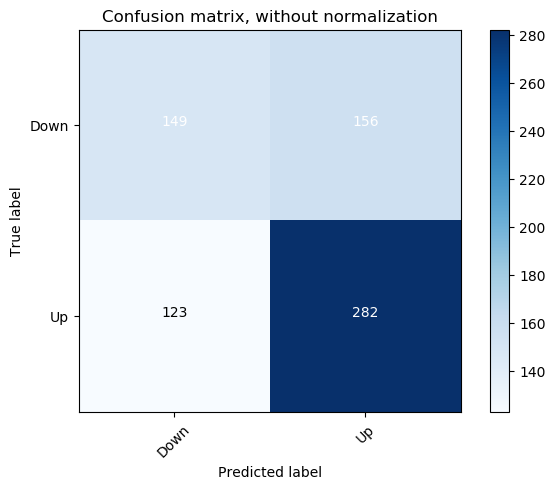

In [16]:
import itertools
plt. style .use('default')

def plot_confusion_matrix(cm, classes,
                          normalize= False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
   
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Compute confusion matrix
cfm_matrix = metrics.confusion_matrix(response_test , y_pred1)
np.set_printoptions ( precision =2)

# Plot non-normalized confusion matrix
plt.figure ()
plot_confusion_matrix(cfm_matrix, classes =['Down', 'Up'],
                      title = 'Confusion matrix, without normalization')
print("")
print('Sensitivity/Recall (TRUE POS. RATE) = '+str(cfm_matrix[1,1]/(cfm_matrix[1,1]+cfm_matrix[1,0])))
print('Specificity (TRUE NEG. RATE) = '+str(cfm_matrix[0,0]/(cfm_matrix[0,0]+cfm_matrix[0,1])))

#### Plot Confusion Matrix normalized, RF unbalanced

Normalized confusion matrix
[[0.49 0.51]
 [0.3  0.7 ]]

Sensitivity (TRUE POS. RATE) = 0.6962962962962963
Specificity (TRUE NEG. RATE) = 0.4885245901639344


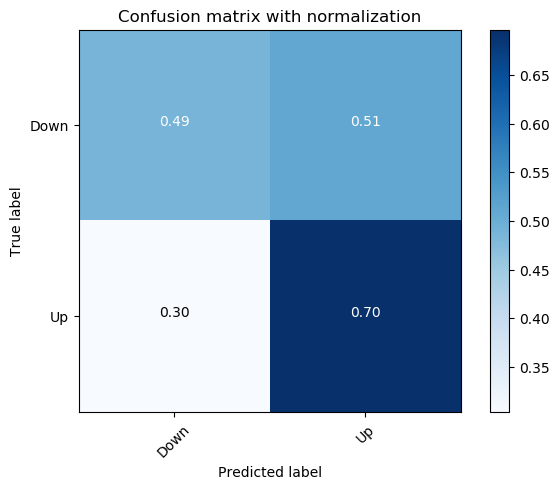

In [17]:
import itertools
plt.style.use('default')

def plot_confusion_matrix(cm, classes,
                          normalize= True,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
   
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Compute confusion matrix
cfm_matrix = metrics.confusion_matrix(response_test , y_pred1)
np.set_printoptions( precision =2)
# plot normalized   confusion   matrix
plt.figure()
plot_confusion_matrix(cfm_matrix, classes =['Down', 'Up'],
                      title = 'Confusion matrix with normalization')
print("")
print('Sensitivity (TRUE POS. RATE) = '+str(cfm_matrix[1,1]/(cfm_matrix[1,1]+cfm_matrix[1,0])))
print('Specificity (TRUE NEG. RATE) = '+str(cfm_matrix[0,0]/(cfm_matrix[0,0]+cfm_matrix[0,1])))

#### Cross-Validation: Precision Scores, RF unbalanced
TP/(TP+FP)

In [18]:
print('Precision scores for different input data')
print(55*'_'+'\n')

# precision train set
scores = cross_val_score(rf1, feature_train, response_train, scoring = 'precision')
print('CV precision on train set: {0: .3f} +/- {1: .3f}'.format(np.mean(scores), np.std(scores))+'\n')

# precision test set
scores = cross_val_score(rf1, feature_test, response_test, scoring = 'precision')
print('CV precision on test set: {0: .3f} +/- {1: .3f}'.format(np.mean(scores), np.std(scores))+'\n')

# precision prediction
scores = cross_val_score(rf1, feature_test, y_pred1, scoring = 'precision')
print('CV precision on test prediction set: {0: .3f} +/- {1: .3f}'.format(np.mean(scores), np.std(scores))+'\n')

Precision scores for different input data
_______________________________________________________

CV precision on train set:  0.642 +/-  0.007

CV precision on test set:  0.641 +/-  0.031

CV precision on test prediction set:  0.750 +/-  0.024



#### Cross-Validation: Recall (Sensitivity) Scores, RF unbalanced

In [19]:
print('Recall scores for different input data')
print(55*'_'+'\n')

# recall train set
scores = cross_val_score(rf1, feature_train, response_train, scoring = 'recall')
print('CV recall on train set: {0: .3f} +/- {1: .3f}'.format(np.mean(scores), np.std(scores))+'\n')

# recall test set
scores = cross_val_score(rf1, feature_test, response_test, scoring = 'recall')
print('CV recall on test set: {0: .3f} +/- {1: .3f}'.format(np.mean(scores), np.std(scores))+'\n')

# recall prediction
scores = cross_val_score(rf1, feature_test, y_pred1, scoring = 'recall')
print('CV recall on test prediction set: {0: .3f} +/- {1: .3f}'.format(np.mean(scores), np.std(scores))+'\n')

Recall scores for different input data
_______________________________________________________

CV recall on train set:  0.694 +/-  0.016

CV recall on test set:  0.674 +/-  0.032

CV recall on test prediction set:  0.799 +/-  0.012



#### Plot ROC_AUC curve: with ABSOLUT numbers, RF unbalanced

In [70]:
# Compute ROC curve and ROC area (AUC) for each class
fpr, tpr, thresholds = metrics.roc_curve(response_test, y_pred1)
roc_auc = metrics.auc(fpr, tpr)

0.5924104432301154

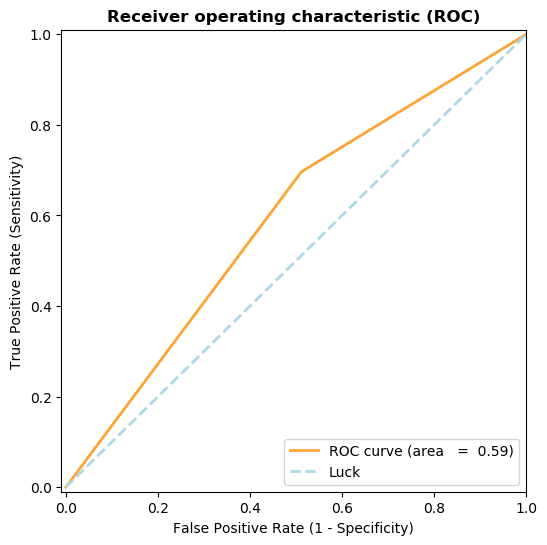

In [21]:
plt.figure(figsize =(6,   6))
plt.plot(fpr, tpr ,   lw=2,
         label = 'ROC curve (area   = {0: 0.2f})'.format(roc_auc), color= 'darkorange', alpha = .8)
plt.plot([0, 1], [0, 1], lw=2, c = 'k', linestyle ='--', label = 'Luck', color = 'lightblue')
plt.xlim([-0.01, 1.0])
plt.ylim([-0.01, 1.01])
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.title('Receiver operating characteristic (ROC)', fontweight ='bold', fontsize =12)
plt.legend(loc= "lower right")

#### Plot ROC_AUC curve: with PROBABILITIES, RF unbalanced

In [22]:
# define probabilities of prediction
probas1_ = rf1.fit(feature_train, response_train).predict_proba(feature_test)

In [23]:
# Compute ROC curve and area the curve
fpr, tpr, thresholds = metrics.roc_curve(response_test, probas1_[:, 1])
roc_auc = metrics.auc(fpr , tpr)

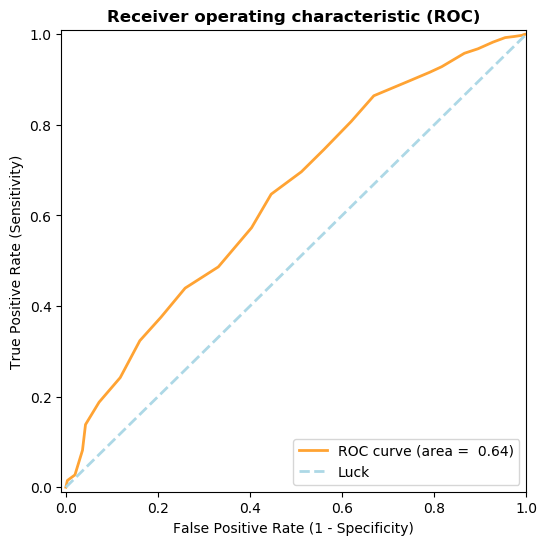

In [24]:
plt.figure(figsize =(6,   6))
plt.plot(fpr, tpr, lw=2,
         label = 'ROC curve (area = {0: 0.2f})'.format(roc_auc), color ='darkorange', alpha = .8)
plt.plot([0, 1], [0, 1], lw=2, c = 'k', linestyle ='--', label = 'Luck', color = 'lightblue')
plt.xlim([-0.01, 1.0])
plt.ylim([-0.01, 1.01])
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.title('Receiver operating characteristic (ROC)', fontweight ='bold',   fontsize =12)
plt.legend(loc= "lower right")


### 3.2.2. Classifier: RandomForest, Classweight: balanced

#### Fit Forest, print Sores

In [25]:
# Import necessary functions
from sklearn.model_selection import StratifiedKFold,cross_val_score
from sklearn.ensemble import RandomForestClassifier
# Create RandomForest object
rf2 = RandomForestClassifier(bootstrap=True, class_weight='balanced', criterion='gini',
                            max_depth=None, max_features='auto', max_leaf_nodes=None,
                            min_impurity_decrease=0.0, min_impurity_split=None,
                            min_samples_leaf=1, min_samples_split=2,
                            min_weight_fraction_leaf=0.0, n_estimators=30, n_jobs=1,
                            oob_score=False, random_state=10, verbose=0, warm_start=False)


In [26]:
# Run CV (= None) and print results
scores =  cross_val_score(rf2, feature_train, response_train)
print(scores)
print('CV accuracy on train set: {0: .3f} +/- {1: .3f}'.format(np.mean(scores), np.std(scores))+'\n')

# CV (= None) AUC score on train set
scores = cross_val_score(rf2, feature_train, response_train, scoring = 'roc_auc')
print ('CV  AUC on train set: {0: .3f} +/- {1: .3f}'.format(np.mean(scores), np.std(scores)))

[0.58 0.58 0.62]
CV accuracy on train set:  0.593 +/-  0.019

CV  AUC on train set:  0.609 +/-  0.014


In [27]:
from sklearn.model_selection import cross_validate
# Calculate return
measures = ['accuracy', 'recall', 'roc_auc']
scores = cross_validate(rf2, feature_train, response_train, scoring = measures, n_jobs =2)
scores

# print scores
print('Train set accuracy: ' ,scores ['train_accuracy'].mean())
print('Validation set scores: ',scores ['test_accuracy'].mean())
print('Test set accuracy : ',rf2.fit(feature_test , response_test).score(feature_test, response_test))

Train set accuracy:  0.9992949056936364
Validation set scores:  0.593093355108859
Test set accuracy :  0.9985915492957746


#### Prediction, RF balanced

In [81]:
# define y predicted
y_pred2 = rf2.fit(feature_train, response_train).predict(feature_test)
display(y_pred2[0:20])

from sklearn.metrics import accuracy_score
print('Accuracy on prediction = ' + str(accuracy_score(response_test, y_pred2)))

array([1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1])

Accuracy on prediction = 0.6197183098591549


In [29]:
print('Metrics of Classification with RandomForest (best parameters), classweight = unbalanced:'+'\n')
print(metrics.classification_report(response_test, y_pred2)+'\n')

Metrics of Classification with RandomForest (best parameters), classweight = unbalanced:

             precision    recall  f1-score   support

          0       0.56      0.50      0.53       305
          1       0.65      0.71      0.68       405

avg / total       0.62      0.62      0.62       710




#### Plot Confusion Matrix non-normalized,  RF balanced

Confusion matrix, without normalization
[[153 152]
 [118 287]]

Sensitivity/Recall (TRUE POS. RATE) = 0.7086419753086419
Specificity (TRUE NEG. RATE) = 0.5016393442622951


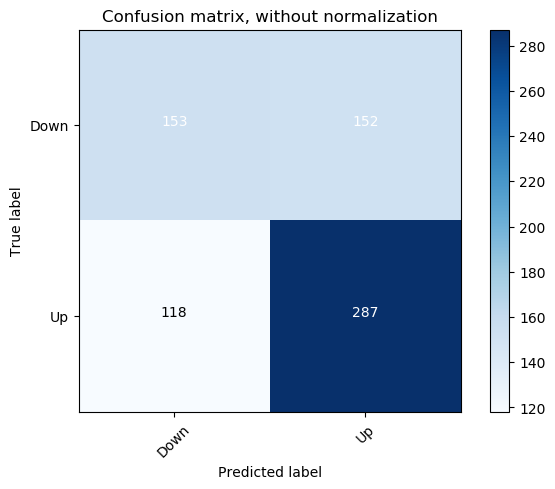

In [30]:
import itertools
plt. style .use('default')

def plot_confusion_matrix(cm, classes,
                          normalize= False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
   
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Compute confusion matrix
cfm_matrix = metrics.confusion_matrix(response_test , y_pred2)
np.set_printoptions ( precision =2)
# Plot non-normalized confusion matrix
plt.figure ()
plot_confusion_matrix(cfm_matrix, classes =['Down', 'Up'],
                      title = 'Confusion matrix, without normalization')
print("")
print('Sensitivity/Recall (TRUE POS. RATE) = '+str(cfm_matrix[1,1]/(cfm_matrix[1,1]+cfm_matrix[1,0])))
print('Specificity (TRUE NEG. RATE) = '+str(cfm_matrix[0,0]/(cfm_matrix[0,0]+cfm_matrix[0,1])))

#### Plot Confusion Matrix normalized,  RF balanced

Normalized confusion matrix
[[0.5  0.5 ]
 [0.29 0.71]]

Sensitivity (TRUE POS. RATE) = 0.7086419753086419
Specificity (TRUE NEG. RATE) = 0.5016393442622951


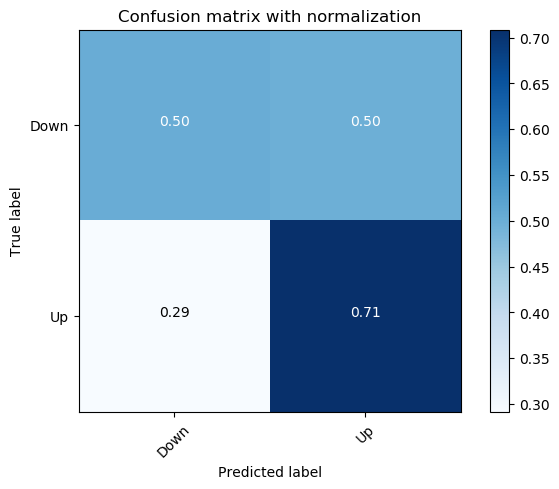

In [31]:
import itertools
plt.style.use('default')

def plot_confusion_matrix(cm, classes,
                          normalize= True,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
   
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Compute confusion matrix
cfm_matrix = metrics.confusion_matrix(response_test , y_pred2)
np.set_printoptions( precision =2)
# plot normalized   confusion   matrix
plt.figure()
plot_confusion_matrix(cfm_matrix, classes =['Down', 'Up'],
                      title = 'Confusion matrix with normalization')
print("")
print('Sensitivity (TRUE POS. RATE) = '+str(cfm_matrix[1,1]/(cfm_matrix[1,1]+cfm_matrix[1,0])))
print('Specificity (TRUE NEG. RATE) = '+str(cfm_matrix[0,0]/(cfm_matrix[0,0]+cfm_matrix[0,1])))


#### Precision Scores,  RF balanced

In [32]:
print('Precision scores for different input data')
print(55*'_'+'\n')

# precision train set
scores = cross_val_score(rf2, feature_train, response_train, scoring = 'precision')
print('CV precision on train set: {0: .3f} +/- {1: .3f}'.format(np.mean(scores), np.std(scores))+'\n')

# precision test set
scores = cross_val_score(rf2, feature_test, response_test, scoring = 'precision')
print('CV precision on test set: {0: .3f} +/- {1: .3f}'.format(np.mean(scores), np.std(scores))+'\n')

# precision prediction
scores = cross_val_score(rf2, feature_test, y_pred2, scoring = 'precision')
print('CV precision on test prediction set: {0: .3f} +/- {1: .3f}'.format(np.mean(scores), np.std(scores))+'\n')

Precision scores for different input data
_______________________________________________________

CV precision on train set:  0.634 +/-  0.013

CV precision on test set:  0.643 +/-  0.019

CV precision on test prediction set:  0.749 +/-  0.013



#### Recall Scores,  RF balanced

In [33]:
print('Recall scores for different input data')
print(55*'_'+'\n')

# recall train set
scores = cross_val_score(rf2, feature_train, response_train, scoring = 'recall')
print('CV recall on train set: {0: .3f} +/- {1: .3f}'.format(np.mean(scores), np.std(scores))+'\n')

# recall test set
scores = cross_val_score(rf2, feature_test, response_test, scoring = 'recall')
print('CV recall on test set: {0: .3f} +/- {1: .3f}'.format(np.mean(scores), np.std(scores))+'\n')

# recall prediction
scores = cross_val_score(rf2, feature_test, y_pred2, scoring = 'recall')
print('CV recall on test prediction set: {0: .3f} +/- {1: .3f}'.format(np.mean(scores), np.std(scores))+'\n')

Recall scores for different input data
_______________________________________________________

CV recall on train set:  0.708 +/-  0.024

CV recall on test set:  0.689 +/-  0.042

CV recall on test prediction set:  0.854 +/-  0.030



#### Plot ROC_AUC curve: with ABSOLUT numbers,  RF balanced

In [34]:
# Compute ROC curve and ROC area (AUC) for each class
fpr, tpr, thresholds = metrics.roc_curve(response_test, y_pred2)
roc_auc = metrics.auc(fpr, tpr)

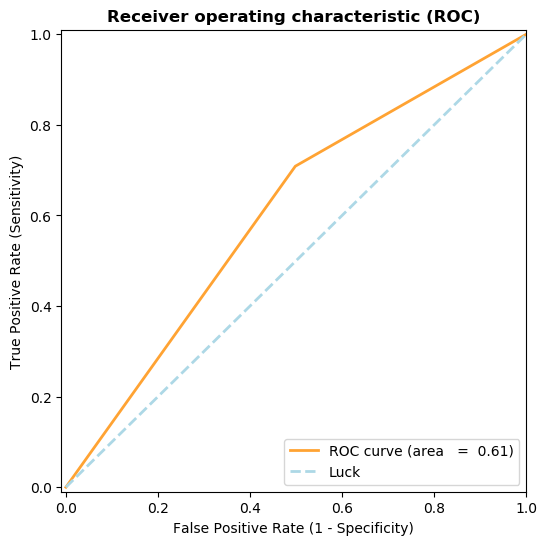

In [35]:
plt.figure(figsize =(6,   6))
plt.plot(fpr, tpr ,   lw=2,
         label = 'ROC curve (area   = {0: 0.2f})'.format(roc_auc), color= 'darkorange', alpha = .8)
plt.plot([0, 1], [0, 1], lw=2, c = 'k', linestyle ='--', label = 'Luck', color = 'lightblue')
plt.xlim([-0.01, 1.0])
plt.ylim([-0.01, 1.01])
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.title('Receiver operating characteristic (ROC)', fontweight ='bold', fontsize =12)
plt.legend(loc= "lower right")

#### Plot ROC_AUC curve: with PROBABILITIES,  RF balanced

In [36]:
# define probabilities of prediction
probas2_ = rf2.fit(feature_train, response_train).predict_proba(feature_test)

In [37]:
# Compute ROC curve and area the curve
fpr, tpr, thresholds = metrics.roc_curve(response_test, probas2_[:, 1])
roc_auc = metrics.auc(fpr , tpr)

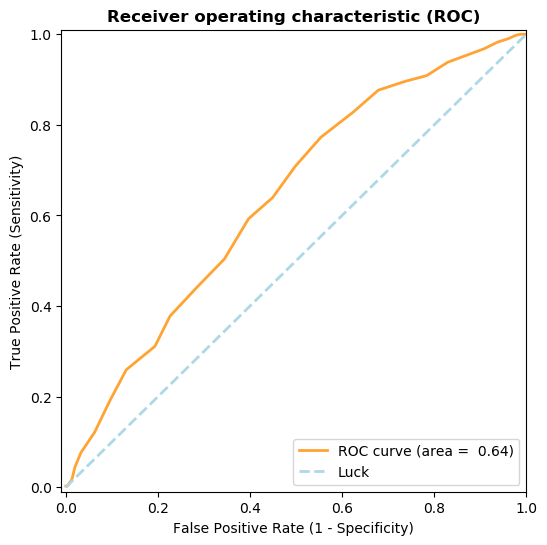

In [38]:
plt.figure(figsize =(6,   6))
plt.plot(fpr, tpr, lw=2,
         label = 'ROC curve (area = {0: 0.2f})'.format(roc_auc), color ='darkorange', alpha = .8)
plt.plot([0, 1], [0, 1], lw=2, c = 'k', linestyle ='--', label = 'Luck', color = 'lightblue')
plt.xlim([-0.01, 1.0])
plt.ylim([-0.01, 1.01])
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.title('Receiver operating characteristic (ROC)', fontweight ='bold',   fontsize =12)
plt.legend(loc= "lower right")

###   
###   
###   
###     
##### ----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
##### ==> NOTE: FOR BEST RESULTS; Restart Kernel (to delete variables) and run through packages in the beginning, whole section 3-0 Settings and whole section 3.1.: Import Version 1.1 with pre-selection RF for usage in the following section.
##### ---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------- 

In [39]:
print(briefing, '\n')


You chose VERSION 2. This Version has no Feature Selection Method because Feature Matrix is whole, not reduced.
SELECTION is therefore "none" by Default. 



## 3.3. Second Best combination of classifier  & parameters

#### ==> Best Version 1.1 with RF pre-selection and LogisticRegression classifier

### 3.3.1. Classifier: LogisticRegression, Classweight: unbalanced

#### Fit LogReg and print scores

In [40]:
# Import necessary functions
from sklearn.model_selection import StratifiedKFold,cross_val_score
from sklearn.linear_model import LogisticRegression

# Create k-Fold CV and LogReg object
kFold = StratifiedKFold(n_splits =5, random_state =0)
logReg1 = LogisticRegression()

# Run CV(= None) and print results
scores =  cross_val_score(logReg1, feature_train, response_train, cv= kFold)
print(scores)
print('CV accuracy on train set: {0: .3f} +/- {1: .3f}'.format(np.mean(scores), np.std(scores)))

[0.59 0.59 0.58 0.58 0.59]
CV accuracy on train set:  0.586 +/-  0.005


In [41]:
# CV AUC score on train set
scores = cross_val_score(logReg1, feature_train, response_train, cv=kFold , scoring = 'roc_auc')
print ('CV  AUC on train set: {0: .3f} +/- {1: .3f}'.format(np.mean(scores), np.std(scores)))

CV  AUC on train set:  0.554 +/-  0.021


In [42]:
from sklearn.model_selection import cross_validate
# Calculate return
measures = ['accuracy', 'recall', 'roc_auc']
scores = cross_validate(logReg1, feature_train, response_train, cv=kFold, scoring = measures, n_jobs =2)
scores

{'fit_time': array([0.04, 0.07, 0.1 , 0.04, 0.03]),
 'score_time': array([0.01, 0.03, 0.02, 0.  , 0.  ]),
 'test_accuracy': array([0.59, 0.59, 0.58, 0.58, 0.59]),
 'test_recall': array([0.96, 0.94, 0.94, 0.95, 0.96]),
 'test_roc_auc': array([0.58, 0.51, 0.56, 0.56, 0.56]),
 'train_accuracy': array([0.58, 0.59, 0.59, 0.59, 0.59]),
 'train_recall': array([0.96, 0.94, 0.94, 0.95, 0.96]),
 'train_roc_auc': array([0.55, 0.57, 0.56, 0.56, 0.56])}

In [43]:
# print scores
print('Train set accuracy (CV=5): ' ,scores ['train_accuracy'].mean())
print('Validation set scores (CV=5): ',scores ['test_accuracy'].mean())
print('Test set accuracy : ',logReg1.fit(feature_test , response_test).score(feature_test, response_test))

Train set accuracy (CV=5):  0.5869180408577337
Validation set scores (CV=5):  0.586387572479329
Test set accuracy :  0.5859154929577465


#### Prediction with LogReg unbalanced

In [82]:
# define y predicted
y_pred3 = logReg1.fit(feature_train, response_train).predict(feature_test)
display(y_pred3[0:20])

from sklearn.metrics import accuracy_score
print('Accuracy on prediction = ' + str(accuracy_score(response_test, y_pred3)))

array([0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

Accuracy on prediction = 0.5859154929577465


In [45]:
print('Metrics of Classification with LogisticRegression (random parameters), classweight = unbalanced:'+'\n')
print(metrics.classification_report(response_test, y_pred3)+'\n')

Metrics of Classification with LogisticRegression (random parameters), classweight = unbalanced:

             precision    recall  f1-score   support

          0       0.65      0.08      0.14       305
          1       0.58      0.97      0.73       405

avg / total       0.61      0.59      0.48       710




#### Plot Confusion matrix non normalized, LogReg unbalanced

Confusion matrix, without normalization
[[ 24 281]
 [ 13 392]]
Sensitivity (TRUE POS. RATE) = 0.9679012345679012
Specificity (TRUE NEG. RATE) = 0.07868852459016394


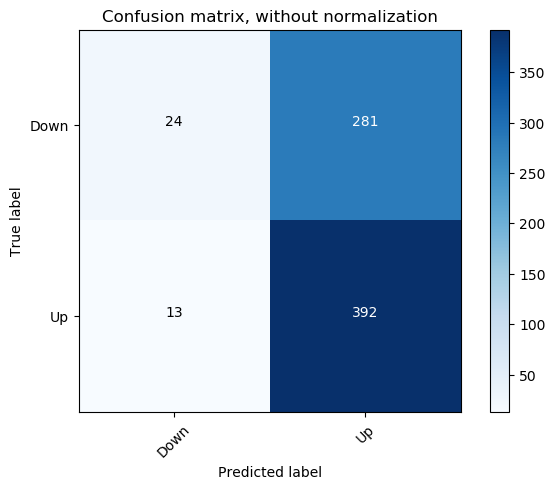

In [46]:
import itertools
plt. style .use('default')

def plot_confusion_matrix(cm, classes,
                          normalize= False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
   
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Compute confusion matrix
cfm_matrix = metrics.confusion_matrix(response_test , y_pred3)
np.set_printoptions ( precision =2)
# Plot non-normalized confusion matrix
plt.figure ()
plot_confusion_matrix(cfm_matrix, classes =['Down', 'Up'],
                      title = 'Confusion matrix, without normalization')

print('Sensitivity (TRUE POS. RATE) = '+str(cfm_matrix[1,1]/(cfm_matrix[1,1]+cfm_matrix[1,0])))
print('Specificity (TRUE NEG. RATE) = '+str(cfm_matrix[0,0]/(cfm_matrix[0,0]+cfm_matrix[0,1])))

#### Plot normalized confusion matrix, LogReg unbalanced

Normalized confusion matrix
[[0.08 0.92]
 [0.03 0.97]]
Sensitivity (TRUE POS. RATE) = 0.9679012345679012
Specificity (TRUE NEG. RATE) = 0.07868852459016394


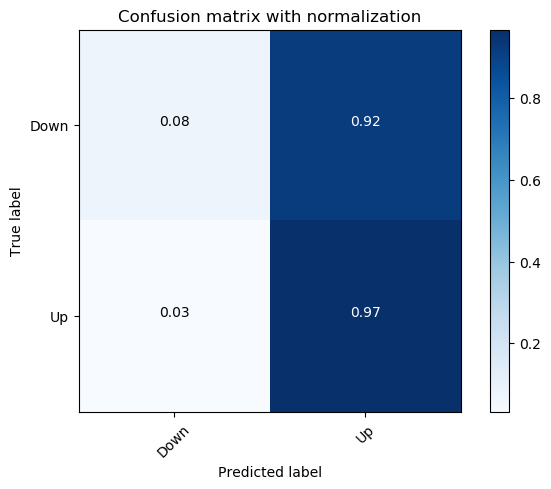

In [47]:
import itertools
plt.style.use('default')

def plot_confusion_matrix(cm, classes,
                          normalize= True,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
   
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Compute confusion matrix
cfm_matrix = metrics.confusion_matrix(response_test , y_pred3)
np.set_printoptions( precision =2)
# plot normalized   confusion   matrix
plt.figure()
plot_confusion_matrix(cfm_matrix, classes =['Down', 'Up'],
                      title = 'Confusion matrix with normalization')

print('Sensitivity (TRUE POS. RATE) = '+str(cfm_matrix[1,1]/(cfm_matrix[1,1]+cfm_matrix[1,0])))
print('Specificity (TRUE NEG. RATE) = '+str(cfm_matrix[0,0]/(cfm_matrix[0,0]+cfm_matrix[0,1])))

#### Precision Scores, LogReg unbalanced

In [48]:
print(briefing+'\n')
print('Precision scores for different input data')
print(55*'_'+'\n')

# precision train set
scores = cross_val_score(logReg1, feature_train, response_train, cv=kFold , scoring = 'precision')
print('CV precision on train set: {0: .3f} +/- {1: .3f}'.format(np.mean(scores), np.std(scores))+'\n')

# precision test set
scores = cross_val_score(logReg1, feature_test, response_test, cv=kFold , scoring = 'precision')
print('CV precision on test set: {0: .3f} +/- {1: .3f}'.format(np.mean(scores), np.std(scores))+'\n')

# precision prediction
scores = cross_val_score(logReg1, feature_test, y_pred3, cv=kFold , scoring = 'precision')
print('CV precision on test prediction set: {0: .3f} +/- {1: .3f}'.format(np.mean(scores), np.std(scores))+'\n')

You chose VERSION 2. This Version has no Feature Selection Method because Feature Matrix is whole, not reduced.
SELECTION is therefore "none" by Default.

Precision scores for different input data
_______________________________________________________

CV precision on train set:  0.589 +/-  0.003

CV precision on test set:  0.582 +/-  0.009

CV precision on test prediction set:  1.000 +/-  0.000



#### Recall Scores, LogReg unbalanced

In [49]:
print(briefing+'\n')
print('Recall scores for different input data')
print(55*'_'+'\n')

# recall train set
scores = cross_val_score(logReg1, feature_train, response_train, cv=kFold , scoring = 'recall')
print('CV recall on train set: {0: .3f} +/- {1: .3f}'.format(np.mean(scores), np.std(scores))+'\n')

# recall test set
scores = cross_val_score(logReg1, feature_test, response_test, cv=kFold , scoring = 'recall')
print('CV recall on test set: {0: .3f} +/- {1: .3f}'.format(np.mean(scores), np.std(scores))+'\n')

# recall prediction
scores = cross_val_score(logReg1, feature_test, y_pred3, cv=kFold , scoring = 'recall')
print('CV recall on test prediction set: {0: .3f} +/- {1: .3f}'.format(np.mean(scores), np.std(scores)))

You chose VERSION 2. This Version has no Feature Selection Method because Feature Matrix is whole, not reduced.
SELECTION is therefore "none" by Default.

Recall scores for different input data
_______________________________________________________

CV recall on train set:  0.950 +/-  0.009

CV recall on test set:  0.916 +/-  0.030

CV recall on test prediction set:  0.997 +/-  0.006


#### Plot ROC_AUC curve: with ABSOLUT numbers, LogReg unbalanced

In [50]:
# Compute ROC curve and ROC area (AUC) for each class
fpr, tpr, thresholds = metrics.roc_curve(response_test, y_pred3)
roc_auc = metrics.auc(fpr, tpr)

You chose VERSION 2. This Version has no Feature Selection Method because Feature Matrix is whole, not reduced.
SELECTION is therefore "none" by Default.


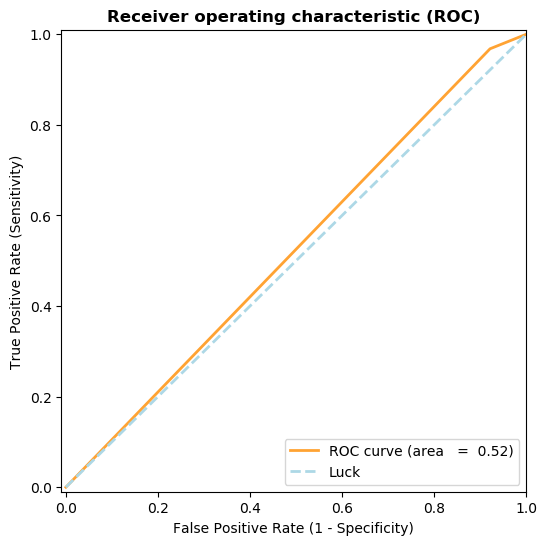

In [51]:
plt.figure(figsize =(6,   6))
plt.plot(fpr, tpr ,   lw=2,
         label = 'ROC curve (area   = {0: 0.2f})'.format(roc_auc), color= 'darkorange', alpha = .8)
plt.plot([0, 1], [0, 1], lw=2, c = 'k', linestyle ='--', label = 'Luck', color = 'lightblue')
plt.xlim([-0.01, 1.0])
plt.ylim([-0.01, 1.01])
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.title('Receiver operating characteristic (ROC)', fontweight ='bold', fontsize =12)
plt.legend(loc= "lower right")
print(briefing)

#### Plot ROC_AUC curve: with PROBABILITIES, LogReg unbalanced

In [52]:
# define probabilities of prediction
probas3_ = logReg1.fit(feature_train, response_train).predict_proba(feature_test)

In [53]:
# Compute ROC curve and area the curve
fpr, tpr, thresholds = metrics.roc_curve(response_test, probas3_[:, 1])
roc_auc = metrics.auc(fpr , tpr)

You chose VERSION 2. This Version has no Feature Selection Method because Feature Matrix is whole, not reduced.
SELECTION is therefore "none" by Default.


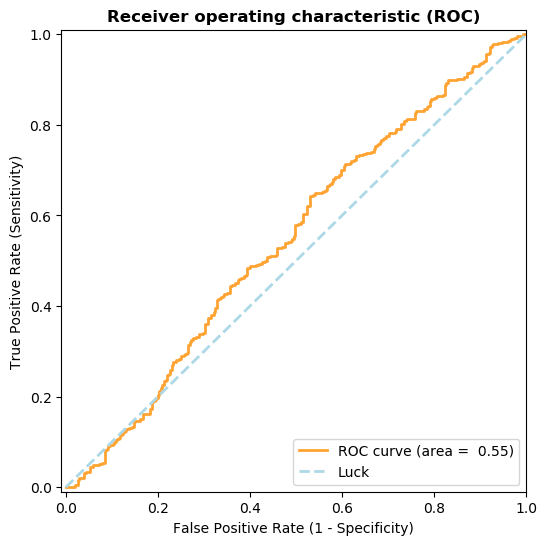

In [54]:
plt.figure(figsize =(6,   6))
plt.plot(fpr, tpr, lw=2,
         label = 'ROC curve (area = {0: 0.2f})'.format(roc_auc), color ='darkorange', alpha = .8)
plt.plot([0, 1], [0, 1], lw=2, c = 'k', linestyle ='--', label = 'Luck', color = 'lightblue')
plt.xlim([-0.01, 1.0])
plt.ylim([-0.01, 1.01])
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.title('Receiver operating characteristic (ROC)', fontweight ='bold',   fontsize =12)
plt.legend(loc= "lower right")
print(briefing)

### 3.3.2. Classifier: LogisticRegression, Classweight: balanced

#### Fit LogReg, print Scores

In [55]:
# Create k-Fold CV and LogReg object
kFold = StratifiedKFold(n_splits =5, random_state =0)
logReg2 = LogisticRegression(class_weight = 'balanced')
# Run CV and print results
scores =  cross_val_score(logReg2, feature_train, response_train, cv= kFold )
print(scores)
print('CV accuracy on train set: {0: .3f} +/- {1: .3f}'.format(np.mean(scores), np.std(scores)))

[0.57 0.55 0.58 0.57 0.59]
CV accuracy on train set:  0.571 +/-  0.015


In [56]:
scores = cross_val_score(logReg2, feature_train, response_train, cv=kFold , scoring = 'roc_auc')
print ('CV  AUC on train set: {0: .3f} +/- {1: .3f}'.format(np.mean(scores), np.std(scores)))

CV  AUC on train set:  0.555 +/-  0.024


In [57]:
# Calculate return
measures = ['accuracy', 'recall', 'roc_auc']
scores = cross_validate(logReg2, feature_train, response_train, cv=kFold, scoring = measures, n_jobs =2)
scores

{'fit_time': array([0.09, 0.09, 0.11, 0.14, 0.05]),
 'score_time': array([0.01, 0.01, 0.  , 0.02, 0.  ]),
 'test_accuracy': array([0.57, 0.55, 0.58, 0.57, 0.59]),
 'test_recall': array([0.68, 0.68, 0.72, 0.74, 0.74]),
 'test_roc_auc': array([0.58, 0.51, 0.55, 0.56, 0.58]),
 'train_accuracy': array([0.56, 0.58, 0.58, 0.59, 0.57]),
 'train_recall': array([0.69, 0.69, 0.73, 0.75, 0.75]),
 'train_roc_auc': array([0.56, 0.58, 0.56, 0.57, 0.56])}

In [58]:
# print scores
print('Train set accuracy (CV=5): ' ,scores ['train_accuracy'].mean())
print('Validation set scores (CV=5): ',scores ['test_accuracy'].mean())
print('Test set accuracy : ',logReg2.fit(feature_test , response_test).score(feature_test, response_test))

Train set accuracy (CV=5):  0.5762509162206869
Validation set scores (CV=5):  0.5705394013955039
Test set accuracy :  0.5619718309859155


#### Prediction, LogReg balanced

In [83]:
# define y predicted
y_pred4 = logReg2.fit(feature_train, response_train).predict(feature_test)
display(y_pred4[0:20])

from sklearn.metrics import accuracy_score
print('Accuracy on prediction = ' + str(accuracy_score(response_test, y_pred4)))

array([0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1])

Accuracy on prediction = 0.5633802816901409


In [60]:
print('Metrics of Classification with LogisticRegression (random parameters), classweight = balanced:'+'\n')
print(metrics.classification_report(response_test, y_pred4)+'\n')

Metrics of Classification with LogisticRegression (random parameters), classweight = balanced:

             precision    recall  f1-score   support

          0       0.49      0.37      0.42       305
          1       0.60      0.71      0.65       405

avg / total       0.55      0.56      0.55       710




#### Plot Confusion matrix non normalized, LogReg balanced

Confusion matrix, without normalization
[[114 191]
 [119 286]]
Sensitivity (TRUE POS. RATE) = 0.7061728395061728
Specificity (TRUE NEG. RATE) = 0.3737704918032787


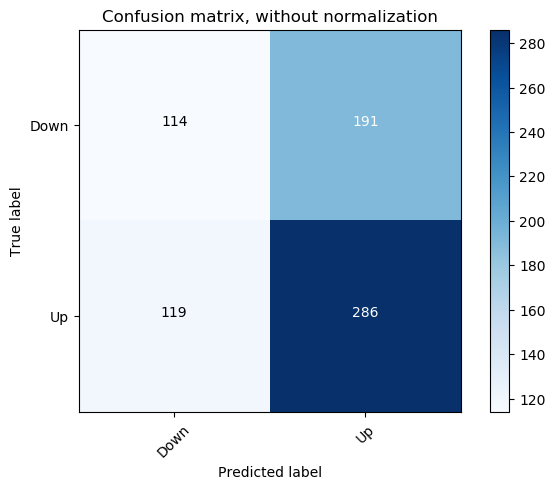

In [61]:
import itertools
plt. style .use('default')

def plot_confusion_matrix(cm, classes,
                          normalize= False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
   
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Compute confusion matrix
cfm_matrix = metrics.confusion_matrix(response_test , y_pred4)
np.set_printoptions ( precision =2)
# Plot non-normalized confusion matrix
plt.figure ()
plot_confusion_matrix(cfm_matrix, classes =['Down', 'Up'],
                      title = 'Confusion matrix, without normalization')

print('Sensitivity (TRUE POS. RATE) = '+str(cfm_matrix[1,1]/(cfm_matrix[1,1]+cfm_matrix[1,0])))
print('Specificity (TRUE NEG. RATE) = '+str(cfm_matrix[0,0]/(cfm_matrix[0,0]+cfm_matrix[0,1])))

#### Plot normalized confusion matrix, LogReg balanced

Normalized confusion matrix
[[0.37 0.63]
 [0.29 0.71]]
Sensitivity (TRUE POS. RATE) = 0.7061728395061728
Specificity (TRUE NEG. RATE) = 0.3737704918032787


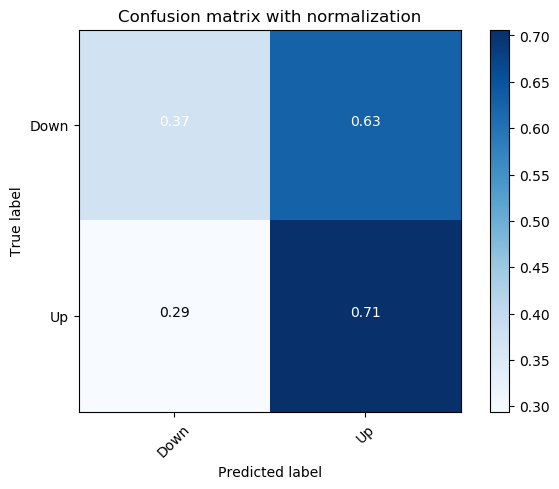

In [62]:
import itertools
plt.style.use('default')

def plot_confusion_matrix(cm, classes,
                          normalize= True,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
   
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Compute confusion matrix
cfm_matrix = metrics.confusion_matrix(response_test , y_pred4)
np.set_printoptions( precision =2)
# plot normalized   confusion   matrix
plt.figure()
plot_confusion_matrix(cfm_matrix, classes =['Down', 'Up'],
                      title = 'Confusion matrix with normalization')

print('Sensitivity (TRUE POS. RATE) = '+str(cfm_matrix[1,1]/(cfm_matrix[1,1]+cfm_matrix[1,0])))
print('Specificity (TRUE NEG. RATE) = '+str(cfm_matrix[0,0]/(cfm_matrix[0,0]+cfm_matrix[0,1])))

#### Precision Scores, LogReg balanced

In [63]:
print('Precision scores for different input data')
print(55*'_'+'\n')

# precision train set
scores = cross_val_score(logReg2, feature_train, response_train, cv=kFold , scoring = 'precision')
print('CV precision on train set: {0: .3f} +/- {1: .3f}'.format(np.mean(scores), np.std(scores))+'\n')

# precision test set
scores = cross_val_score(logReg2, feature_test, response_test, cv=kFold , scoring = 'precision')
print('CV precision on test set: {0: .3f} +/- {1: .3f}'.format(np.mean(scores), np.std(scores))+'\n')

# precision prediction
scores = cross_val_score(logReg2, feature_test, y_pred4, cv=kFold , scoring = 'precision')
print('CV precision on test prediction set: {0: .3f} +/- {1: .3f}'.format(np.mean(scores), np.std(scores)))

Precision scores for different input data
_______________________________________________________

CV precision on train set:  0.612 +/-  0.011

CV precision on test set:  0.581 +/-  0.018

CV precision on test prediction set:  0.991 +/-  0.004


#### Recall Scores, LogReg balanced

In [64]:
print('Recall scores for different input data')
print(55*'_'+'\n')

# recall train set
scores = cross_val_score(logReg2, feature_train, response_train, cv=kFold , scoring = 'recall')
print('CV recall on train set: {0: .3f} +/- {1: .3f}'.format(np.mean(scores), np.std(scores))+'\n')

# recall test set
scores = cross_val_score(logReg2, feature_test, response_test, cv=kFold , scoring = 'recall')
print('CV recall on test set: {0: .3f} +/- {1: .3f}'.format(np.mean(scores), np.std(scores))+'\n')

# recall prediction
scores = cross_val_score(logReg2, feature_test, y_pred4, cv=kFold , scoring = 'recall')
print('CV recall on test prediction set: {0: .3f} +/- {1: .3f}'.format(np.mean(scores), np.std(scores)))

Recall scores for different input data
_______________________________________________________

CV recall on train set:  0.714 +/-  0.028

CV recall on test set:  0.694 +/-  0.073

CV recall on test prediction set:  0.971 +/-  0.018


#### Plot ROC_AUC curve: with ABSOLUT numbers, LogReg balanced

In [65]:
 #   Compute   ROC   curve   and   ROC   area   (AUC)   for   each   class
fpr, tpr, thresholds = metrics.roc_curve(response_test, y_pred4)
roc_auc = metrics.auc(fpr, tpr)

You chose VERSION 2. This Version has no Feature Selection Method because Feature Matrix is whole, not reduced.
SELECTION is therefore "none" by Default.


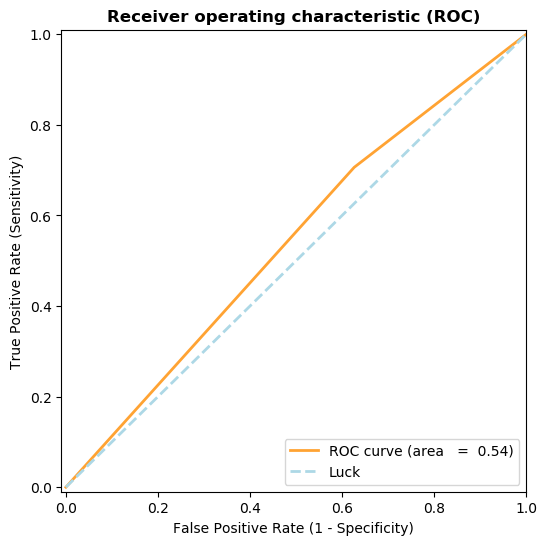

In [66]:
plt.figure(figsize =(6,   6))
plt.plot(fpr, tpr ,   lw=2,
         label = 'ROC curve (area   = {0: 0.2f})'.format(roc_auc), color= 'darkorange', alpha = .8)
plt.plot([0, 1], [0, 1], lw=2, c = 'k',   linestyle ='--', label = 'Luck', color = 'lightblue')
plt.xlim([-0.01, 1.0 ])
plt.ylim([-0.01, 1.01])
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.title('Receiver operating characteristic (ROC)', fontweight ='bold',   fontsize =12)
plt.legend(loc= "lower right")

print(briefing)

#### Plot ROC_AUC curve: with PROBABILITIES, LogReg balanced


In [67]:
# define probabilities of prediction
probas4_ = logReg2.fit(feature_train, response_train).predict_proba(feature_test)

In [68]:
# Compute ROC curve and area the curve
fpr, tpr, thresholds = metrics.roc_curve(response_test, probas4_[:, 1])
roc_auc   =   metrics.auc(fpr , tpr)

You chose VERSION 2. This Version has no Feature Selection Method because Feature Matrix is whole, not reduced.
SELECTION is therefore "none" by Default.


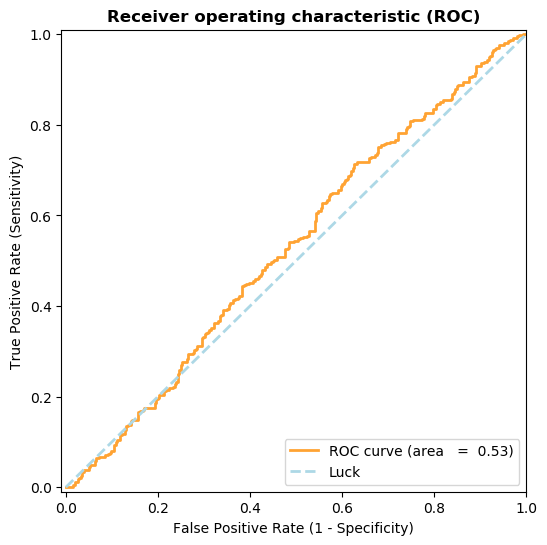

In [69]:
plt. figure (figsize =(6,   6))
plt.plot(fpr, tpr ,   lw=2,
         label = 'ROC curve (area   = {0: 0.2f})'.format(roc_auc), color ='darkorange', alpha = .8)
plt.plot([0, 1], [0, 1], lw=2, c = 'k', linestyle ='--', label = 'Luck', color = 'lightblue')
plt.xlim([-0.01, 1.0 ])
plt.ylim([-0.01, 1.01])
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.title('Receiver operating characteristic (ROC)', fontweight ='bold',   fontsize =12)
plt.legend(loc= "lower right")

print(briefing)

###      
###     
## SUMMARY OF RESULTS


### -> best scores and confusion matrix results with Version 2.1 (RF pre-selection) and a Random Forest classifier balanced
### -> if we run predictions only with reduced dataset, second best output gives Version 1.1 with RF pre-selection and LogisticRegression classifier balanced
### -> original datasets aren't much better than the reduced ones

###   
## COMBINATIONS:
 


### Version 1, no pre-selection, classification with RF
#### unbalanced: Recall 0.558, Specificity 0.452, ROC(absolut numbers) 0.51, ROC(probability) 0.5 ==> bad result, like guessing
#### balanced: Recall 0.51, Specificity 0.5, ROC(absolut numbers) 0.51, ROC(prob.) 0.5 ==> still bad results, like guessing




### Version 1, no pre-selection, classification with LogReg
#### unbalanced: Recall 0.84, Specificity 0.4, ROC(absolut numbers) 0.62, ROC(probability) 0.66 ==> result ok
#### balanced: Recall 0.59, Specificity 0.62, ROC(absolut numbers) 0.61, ROC(prob.) 0.66 ==> results same / worse




### Version 2, no pre-selection, classification with RF
#### unbalanced: Recall 0.696, Specificity 0.48, ROC(absolut numbers) 0.54, ROC(probability) 0.64==> better than guessing
#### balanced: Recall 0.7, Specificity 0.5, ROC(absolut numbers) 0.61, ROC(prob.) 0.64 ==> slightly better results




### Version 2, no pre-selection, classification with LogReg
#### unbalanced: Recall 0.97, Specificity 0.08, ROC(absolut numbers) 0.52, ROC(probability) 0.55 ==>marginal better than guessing
#### balanced: Recall 0.71, Specificity 0.37, ROC(absolut numbers) 0.54, ROC(prob.) 0.53 ==> still not good but better




### Version 1.1, pre-selection with RF, classification with RF
#### unbalanced: Recall 0.59, Specificity 0.46, ROC(absolut numbers) 0.53, ROC(probability) 0.52 ==> bad result, like guessing
#### balanced: Recall 0.59, Specificity 0.449, ROC(absolut numbers) 0.52, ROC(prob.) 0.54 ==> still not good but better




### Version 1.1, pre-selection with RF, classification with LogReg
#### unbalanced: Recall 0.86, Specificity 0.3, ROC(absolut numbers) 0.58, ROC(probability) 0.63 ==> better than guessing
#### balanced: Recall 0.55, Specificity 0.63, ROC(absolut numbers) 0.59, ROC(prob.) 0.63 ==> only slightly better than before




### Version 2.1, pre-selection with RF, classification with RF
#### unbalanced: Recall 0.77, Specificity 0.62, ROC(absolut numbers) 0.69, ROC(probability) 0.74 ==>good result
#### balanced: Recall 0.76, Specificity 0.58, ROC(absolut numbers) 0.67, ROC(prob.) 0.72 ==> slightly worss resluts 




### Version 2.1, pre-selection with RF, classification with LogReg
#### unbalanced: Recall 0.97, Specificity 0.07, ROC(absolut numbers) 0.52, ROC(probability) 0.56 ==>slightly better than guessing
#### balanced: Recall 0.77, Specificity 0.28, ROC(absolut numbers) 0.52, ROC(prob.) 0.55 ==>not much better/ worse results


